In [15]:
m = GPy.models.GPRegression(1.0*np.array([[1],[2],[3]]),1.0*np.array([[1],[2],[3]]))
m.kern.lengthscale.gradient

array([0.88000001])

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import paper_tools
import numpy as np
from shapeintegrals_fast_hypercubes import ShapeIntegralHC as Integral
import GPy

<IPython.core.display.Javascript object>


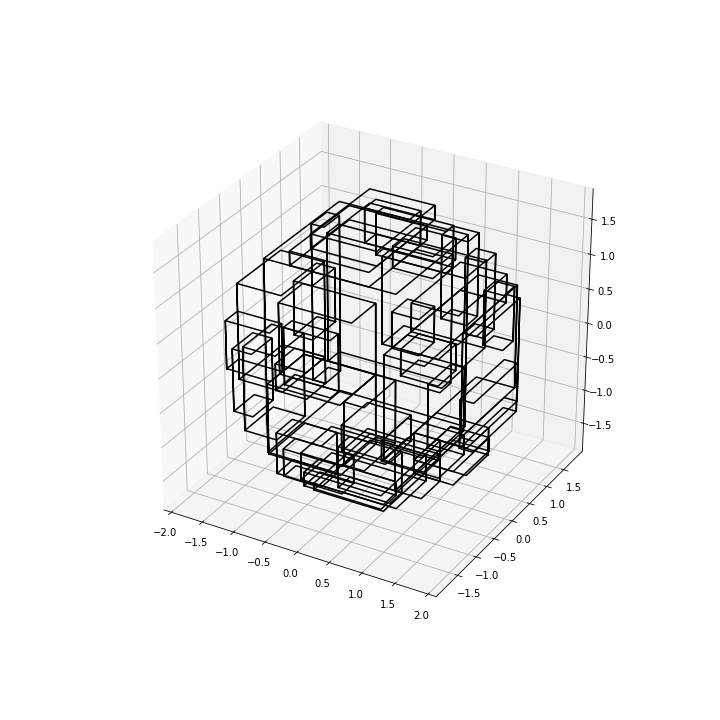

(-2.0349999630762854, 2.03500004244144, -2.0349998973815118, 2.035000002067125)

In [12]:
import rectangles
import numpy as np
newX, startindices,allvolscales,volcorrections, allpolys, allrecs = rectangles.compute_newX(1.0*np.array([[0,0,0,2,0,0,0,0,0,0,0,0]]),dims=3,Nrecs=40,step=0.1,Ntrials=5,spheres=True)
import matplotlib.pyplot as plt
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

for ar in allrecs:
    for r in ar:
        #r+=np.random.randn(r.shape[0],r.shape[1])*0.1
        ax.plot([r[0,0],r[1,0],r[1,0],r[0,0],r[0,0],r[0,0],r[0,0],r[1,0],r[1,0],r[1,0],r[1,0],r[0,0],r[0,0],r[0,0]],[r[0,1],r[0,1],r[1,1],r[1,1],r[0,1],r[0,1],r[0,1],r[0,1],r[1,1],r[1,1],r[1,1],r[1,1],r[0,1],r[0,1]],[r[0,2],r[0,2],r[0,2],r[0,2],r[0,2],r[0,2],r[1,2],r[1,2],r[1,2],r[0,2],r[1,2],r[1,2],r[1,2],r[0,2]],'k-')
ax.axis('equal')

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import GPy
import time
dims = 4
kern = GPy.kern.RBF(dims, lengthscale=2.0, variance = 3.0, ARD=False)
def genspherepoints(centre,radius,N=10):
    dims = len(centre)
    X = ((np.random.rand(N*10,dims)-0.5)*radius*2)+centre
    keep = np.sum((X-centre)**2,1)<radius**2
    return X[keep,:][0:N,:]

point_res = []
for it in range(100000):
    X1 = genspherepoints(np.array([1,0,0,0]),2)
    X2 = genspherepoints(np.array([4,0,0,0]),1)
    #plt.plot(X1[:,0],X1[:,1],'.b')
    #plt.plot(X2[:,0],X2[:,1],'.r')
    #plt.axis('equal')

    rawX1 = np.zeros(dims*(dims+1))
    rawX2 = np.zeros(dims*(dims+1))
    rawX1[0]=1
    rawX2[0]=4
    rawX1[dims]=2
    rawX2[dims]=1
    point_res.append(np.mean(kern.K(X1,X2))*rectangles.polytopeVolume(rawX1,input_space_dim=dims,spheres=True)*rectangles.polytopeVolume(rawX2,input_space_dim=dims,spheres=True))

In [36]:
res = []
for it in range(200):
    if it%10==0: print(it)
    newX1, startindices1,allvolscales1,allvolcorrections1, allpolys1, allrecs1 = rectangles.compute_newX(1.0*np.array([rawX1]),dims=dims,Nrecs=10,step=0.2,Ntrials=7,spheres=True)
    newX2, startindices2,allvolscales2,allvolcorrections2, allpolys2, allrecs2 = rectangles.compute_newX(1.0*np.array([rawX2]),dims=dims,Nrecs=10,step=0.2,Ntrials=7,spheres=True)

    from integral_output_observed import Integral_Output_Observed as Integral
    kernel = Integral(input_dim=dims*2,lengthscale=np.array([2.0]*dims),variances=3.0)
    fullK = kernel.K(np.r_[tuple(newX1[:])],np.r_[tuple(newX2[:])])
    fullK*=np.r_[tuple(allvolcorrections1)][:,None]@np.r_[tuple(allvolcorrections2)][None,:]

    K = np.zeros([len(newX1),len(newX2)])
    for i1,(X1,vscale1,s1,e1) in enumerate(zip(newX1,allvolscales1,startindices1[0:-1],startindices1[1:])):
        for i2,(X2,vscale2,s2,e2) in enumerate(zip(newX2,allvolscales2,startindices2[0:-1],startindices2[1:])):
            K[i1,i2] = np.sum(fullK[s1:e1,s2:e2])#*vscale1*vscale2
    res.append(K[0,0])

0
10
20
30
40
50
60
70
80


KeyboardInterrupt: 

In [37]:
np.std(point_res)/np.sqrt(len(point_res)) #error from sampling

0.1977710355619881

In [38]:
np.mean(np.abs(np.array(point_res)-314.50529423792136))

50.00131671542937

In [39]:
np.mean(np.abs(np.array(res)-314.50529423792136))

25.121281390398234

In [ ]:
import GPy
import time
from shapeintegrals_fast import ShapeIntegral
#best = np.array([[2.12218859, 0.1056407 ],[0.1056407,  0.21341685]])
resarray = []
for Nperunit in [128,256,512]:
    res = []
    start = time.time()
    for it in range(50):
        kern = GPy.kern.RBF(2, lengthscale=1.0, variance = 3.0, ARD=False)
        k = ShapeIntegral(X.shape[1],input_space_dim=2,Nperunit=Nperunit,kernel=kern)
        res.append(k.K(X,X))
        
    end = time.time()
    #resarray.append([Nperunit,end-start,np.mean(np.abs(np.mean(np.array(res)-best,0)))])
    print(resarray[-1])

In [9]:
allvolscales
#sqrt:    array([1.2616487 , 1.70875325, 2.04120551])
#without: array([1.26612581, 1.55341205, 1.82439353])
#-> best to scale by area not root-area

array([1.26433116, 1.55713726, 1.94534779])

In [12]:
import GPy
import time
from shapeintegrals_fast import ShapeIntegral
#best = np.array([[2.12218859, 0.1056407 ],[0.1056407,  0.21341685]])
best = np.array([[2.11754863, 0.10597995, 0.3244951 ],[0.10597995, 0.21340274, 0.13460126],[0.3244951 , 0.13460126, 0.16147062]])
resarray = []
for Nperunit in [128,256,512]:
    res = []
    start = time.time()
    for it in range(50):
        kern = GPy.kern.RBF(2, lengthscale=1.0, variance = 3.0, ARD=False)
        k = ShapeIntegral(X.shape[1],input_space_dim=2,Nperunit=Nperunit,kernel=kern)
        res.append(k.K(X,X))
        
    end = time.time()
    resarray.append([Nperunit,end-start,np.mean(np.abs(np.mean(np.array(res)-best,0)))])
    print(resarray[-1])

 /home/mike/Documents/Research/SheffieldMLpublications/publications/integralkernel/jupyter/shapeintegrals_fast.py:77: RuntimeWarning:divide by zero encountered in true_divide


[128, 2.307523250579834, 0.000588162614215107]
[256, 4.483867883682251, 0.0017972719962620228]
[512, 7.786117792129517, 0.0003840110846893181]


In [13]:
import GPy
import time
from shapeintegrals_fast_hypercubes import ShapeIntegralHC as Integral
#best = np.array([[2.12218859, 0.1056407 ],[0.1056407,  0.21341685]])
#best = np.array([[2.13132188, 0.10561741],[0.10561741, 0.21343597]])
best = np.array([[2.11754863, 0.10597995, 0.3244951 ],[0.10597995, 0.21340274, 0.13460126],[0.3244951 , 0.13460126, 0.16147062]])
resarray = []
for Nrecs in [128,256,512]:
    res = []
    start = time.time()
    for it in range(10):
        k = Integral(X.shape[1],input_space_dim=2,Nrecs=Nrecs,lengthscale=1.0*np.array([1.0,1.0]),variances=np.array(3.0))
        res.append(k.K(X,X))
        
    end = time.time()
    resarray.append([Nrecs,end-start,np.mean(np.abs(np.mean(np.array(res)-best,0)))])
    print(resarray[-1])

[128, 78.65836477279663, 0.0005847659546234997]


KeyboardInterrupt: 

In [ ]:
#1000 iterations of 2000 per unit
print(np.mean(np.array(res),0))
print("")
print(1.96*np.std(np.array(res),0)/np.sqrt(len(res)))

In [ ]:
#plt.hist(np.array(res)[:,1,1],50);

In [ ]:
#"ground truth" (from 10000 points!)
array([[2.12210442, 0.10587477],
       [0.10587477, 0.21357336]])

In [ ]:
X

In [ ]:
#from GPy.kern import Multidimensional_Integral_Limits as Integral
from integral_output_observed import Integral_Output_Observed as Integral
k = Integral(4,variances=np.array(3.0),lengthscale=np.array([1.0,1.0]))
k.K(1.0*np.array([[0,1,0,1.45],[1,2,0,1]]))

In [ ]:
np.set_printoptions(suppress=True,precision=2)
newX